# UTS Deep Learning Number 2
Name: Austin Kane\
NIM: 270222932\
Dataset: [Dataset B](https://drive.google.com/drive/folders/1pThuel6dU23CLRseKzymT4oNDUECq_c6)\
Video Link: [Video2]()

# 2. Convolutional Neural Network
Anda adalah seorang Data Scientist di bidang medis. Anda mendapatkan tugas untuk mengembangkan model **Convolutional Neural Network (CNN)** untuk melakukan klasifikasi gambar/citra medis Osteoarthritis.
Download dataset yang telah disediakan dan kerjakan task berikut ini.
1. Lakukan **Exploratory Data Analysis** untuk memeriksa kondisi data yang anda miliki, seperti histogram warna untuk setiap kategori, aspect ratio, resolution, dan variability (lighting, angle, occlusions, dan sebagainya). Lalu pisahkan data anda menjadi train, validation, dan test dengan proporsi data validation sebesar 15% dari data train! Lakukan pre-processing pada data anda.
2. [LO2, LO3, & LO4 – 10 Poin] Buatlah sebuah **model CNN dengan arsitektur AlexNet secara manual** (tidak menggunakan pre-trained model dari Keras) seperti pada gambar di samping dan adaptasikan output layer pada gambar sesuai dengan dataset anda. Model ini akan disebut sebagai **Baseline Model**. Lakukan training pada model anda dengan minimal 10 epoch.
3. [LO2, LO3, & LO4 – 15 Poin] **Modifikasi arsitektur AlexNet** yang sudah dibuat. Anda bisa menambahkan DropOut, Batch Normalization, dan sebagainya. Anda juga bisa mengganti modelnya dengan arsitektur CNN lain seperti DenseNet, EfficientNet, dan sebagainya. Jelaskan alasan modifikasi anda dan lakukan training (minimal 10 epoch) serta fine-tuning untuk hyperparameter pada model ini.
4. [LO2, LO3, & LO4 – 10 Poin] Lakukan **evaluasi performa model** anda pada data test dengan menggunakan **minimal 3 evaluation metrics**. Analisis, jelaskan, dan simpulkan hasilnya.
5. [LO1, LO2 – 5 Points] Buatlah **video presentasi** yang menjelaskan langkah-langkah pengerjaan anda serta hasil analisis anda dengan durasi maksimal 15 menit.

## Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

## Read the Data

In [13]:
data_dir = 'Data/02/train'  # Menggunakan direktori data yang disediakan

categories = os.listdir(data_dir)  # Misalnya: ['Doubtful', 'Mild', 'Moderate', 'Normal', 'Severe']
print(f"Categories: {categories}")

Categories: ['Doubtful', 'Mild', 'Moderate', 'Normal', 'Severe']


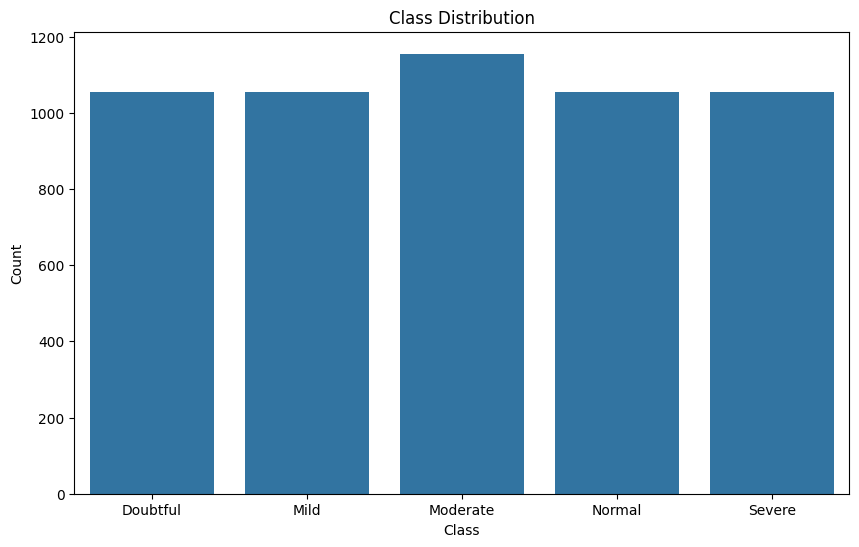

In [14]:
class_counts = [len(os.listdir(os.path.join(data_dir, category))) for category in categories]
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

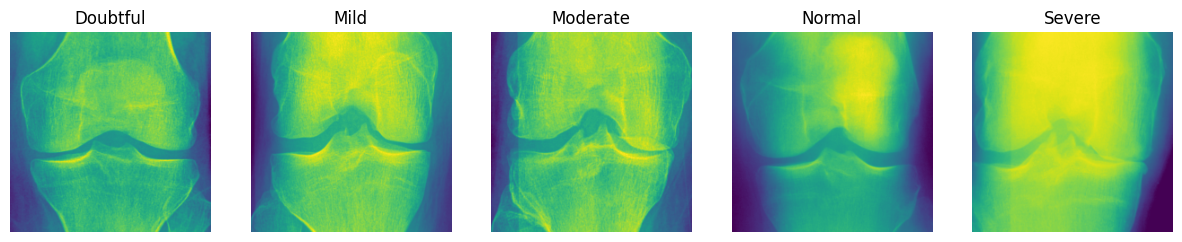

In [15]:
# Contoh visualisasi gambar dari setiap kelas
fig, axes = plt.subplots(1, 5, figsize=(15, 10))
for idx, category in enumerate(categories):
    img_path = os.path.join(data_dir, category, os.listdir(os.path.join(data_dir, category))[0])
    img = Image.open(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(category)
    axes[idx].axis('off')
plt.show()

In [16]:
resolutions = []
for category in categories:
    for img_name in os.listdir(os.path.join(data_dir, category)):
        img = Image.open(os.path.join(data_dir, category, img_name))
        width, height = img.size
        resolutions.append((width, height))

list(set(resolutions))

[(224, 224)]

In [17]:
train_dir = "data/02/train"
test_dir = "data/02/test"

In [18]:
input_shape = (224, 224, 3)
batch_size = 32
num_classes = len(os.listdir(train_dir))
num_classes

5

In [19]:
train_datagen = ImageDataGenerator(
    rotation_range=20, 
    horizontal_flip=True, 
    zoom_range=0.2, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.05, 
    brightness_range=[0.7, 1.3], 
    fill_mode='nearest', 
    validation_split=0.15
)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4570 images belonging to 5 classes.
Found 805 images belonging to 5 classes.


In [21]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread("data/02/train/Doubtful/1_Doubtful_1.png")
print("Shape:", img.shape)

Shape: (224, 224, 3)


In [22]:
base_model = models.Sequential([
    layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((3, 3), strides=2),

    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((3, 3), strides=2),

    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((3, 3), strides=2),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
opt = Adam(learning_rate=0.0001)
base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history = base_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 80s 548ms/step - accuracy: 0.2149 - loss: 3.6081 - val_accuracy: 0.1888 - val_loss: 1.9767
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 76s 531ms/step - accuracy: 0.2292 - loss: 2.4186 - val_accuracy: 0.2124 - val_loss: 1.7266
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 75s 524ms/step - accuracy: 0.2327 - loss: 1.9691 - val_accuracy: 0.2050 - val_loss: 1.6807
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 75s 522ms/step - accuracy: 0.2685 - loss: 1.7416 - val_accuracy: 0.2186 - val_loss: 1.6376
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 75s 522ms/step - accuracy: 0.2583 - loss: 1.6891 - val_accuracy: 0.2447 - val_loss: 1.6444
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 77s 534ms/step - accuracy: 0.2970 - loss: 1.5757 - val_accuracy: 0.2298 - val_loss: 1.9054
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 74s 520ms/step - accuracy: 0.3017 - loss: 1.5168 - val_accuracy: 0.2547 - val_loss: 1.7054
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 76s 529ms/step - accuracy: 0.3116 - loss: 1

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

Found 586 images belonging to 5 classes.


In [25]:
# Model evaluation
test_loss, test_acc = base_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

# Classification Report dan Confusion Matrix
y_true = test_generator.classes
y_pred = base_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.1950 - loss: 1.6985
Test Accuracy: 0.20
Test Loss: 1.69
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33       117
           1       0.00      0.00      0.00       117
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00       118
           4       0.00      0.00      0.00       117

    accuracy                           0.20       586
   macro avg       0.04      0.20      0.07       586
weighted avg       0.04      0.20      0.07       586

Confusion Matrix:
[[117   0   0   0   0]
 [117   0   0   0   0]
 [117   0   0   0   0]
 [118   0   0   0   0]
 [117   0   0   0   0]]


c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4570 images belonging to 5 classes.
Found 805 images belonging to 5 classes.


In [30]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 92s 629ms/step - accuracy: 0.2298 - loss: 2.5755 - val_accuracy: 0.2025 - val_loss: 1.6118
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 91s 634ms/step - accuracy: 0.2152 - loss: 1.6206 - val_accuracy: 0.2199 - val_loss: 1.6218
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 631ms/step - accuracy: 0.2074 - loss: 1.6238 - val_accuracy: 0.2025 - val_loss: 1.6272
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 629ms/step - accuracy: 0.2139 - loss: 1.6111 - val_accuracy: 0.2224 - val_loss: 1.6243
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 631ms/step - accuracy: 0.2226 - loss: 1.6174 - val_accuracy: 0.2137 - val_loss: 1.6668
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 632ms/step - accuracy: 0.2223 - loss: 1.6241 - val_accuracy: 0.2161 - val_loss: 1.6120
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 89s 619ms/step - accuracy: 0.2144 - loss: 1.6136 - val_accuracy: 0.2149 - val_loss: 1.6296
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 629ms/step - accuracy: 0.2258 - loss: 1

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

Found 586 images belonging to 5 classes.


In [33]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

# Classification Report dan Confusion Matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.2617 - loss: 1.6091
Test Accuracy: 0.23
Test Loss: 1.61
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.00      0.00      0.00       117
           2       0.20      0.47      0.28       117
           3       0.00      0.00      0.00       118
           4       0.18      0.47      0.26       117

    accuracy                           0.19       586
   macro avg       0.08      0.19      0.11       586
weighted avg       0.08      0.19      0.11       586

Confusion Matrix:
[[ 0  0 51  0 66]
 [ 0  0 47  0 70]
 [ 0  0 55  0 62]
 [ 0  0 58  0 60]
 [ 0  0 62  0 55]]


c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Austin\anaconda3\envs\utsdl2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


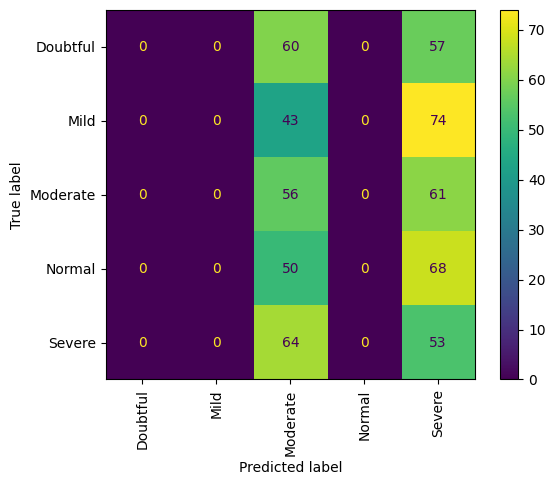

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(xticks_rotation='vertical')
plt.show()

## Explaratory Data Analysis (EDA)

## Data Preprocessing

## Baseline Model

## Hyperparameter Fine-Tuning

## Evaluation